In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('F:/Machine learning/Python/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

F:/Machine learning/Python/dataset\countries.csv
F:/Machine learning/Python/dataset\Food_Production.csv
F:/Machine learning/Python/dataset\kaggle_survey_2017.csv
F:/Machine learning/Python/dataset\kaggle_survey_2018.csv
F:/Machine learning/Python/dataset\kaggle_survey_2019.csv
F:/Machine learning/Python/dataset\kaggle_survey_2020.csv
F:/Machine learning/Python/dataset\kaggle_survey_2021.csv
F:/Machine learning/Python/dataset\kaggle_survey_2022.csv


In [2]:
ecological_footprint = pd.read_csv("F:/Machine learning/Python/dataset/countries.csv")
#ecological_footprint.dropna(how = 'any', inplace=True)

In [3]:
print(ecological_footprint.columns)
print(ecological_footprint.dtypes)
print(ecological_footprint.shape)

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'],
      dtype='object')
Country                            object
Region                             object
Population (millions)             float64
HDI                               float64
GDP per Capita                     object
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
F

Before cleaning Country            0
HDI               16
GDP per Capita    15
dtype: int64
After cleaning Country           0
HDI               0
GDP per Capita    0
dtype: int64
Country            object
HDI               float64
GDP per Capita    float64
dtype: object


<Axes: xlabel='GDP per Capita', ylabel='HDI'>

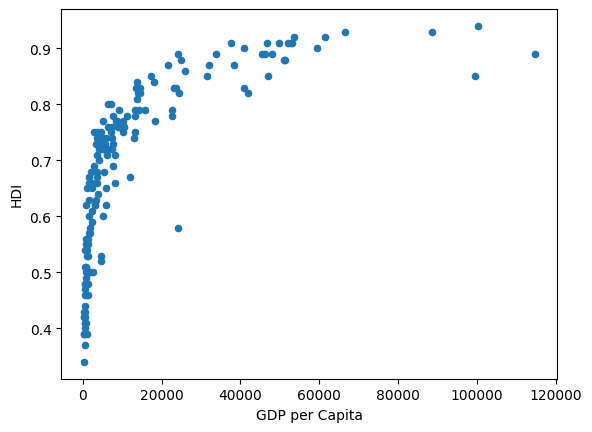

In [4]:
# Relationship between GDP (Gross domestic product) and HDI(Human Development Index)
HDI_GDP = pd.DataFrame(ecological_footprint, columns=['Country','HDI', 'GDP per Capita'])
print('Before cleaning', HDI_GDP.isnull().sum())
HDI_GDP.dropna(how='any', inplace=True)
print('After cleaning', HDI_GDP.isnull().sum())
GDP = HDI_GDP['GDP per Capita']
GDP = GDP.replace({'\$': '', ',': ''}, regex=True).astype(float)
HDI_GDP['GDP per Capita'] = GDP
print(HDI_GDP.dtypes)
HDI_GDP.plot(kind='scatter', x='GDP per Capita', y='HDI')

Well, in general, higher GDP corresponds to higher Human Development Index. However, it's not that simple, let's take a look. 

Before cleaning Country                        0
GDP per Capita                15
Total Ecological Footprint     0
dtype: int64
After cleaning Country                       0
GDP per Capita                0
Total Ecological Footprint    0
dtype: int64


<Axes: xlabel='GDP per Capita', ylabel='Total Ecological Footprint'>

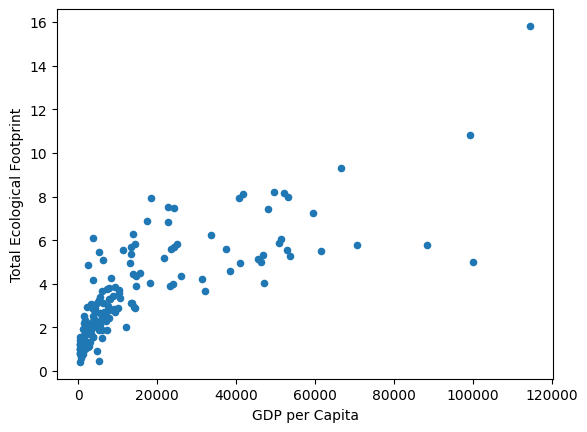

In [5]:
# Relationship between GDP (Gross domestic product) and Total Ecological Footprint
GDP_totalfootprint = pd.DataFrame(ecological_footprint, columns=['Country', 'GDP per Capita', 'Total Ecological Footprint'])
print('Before cleaning', GDP_totalfootprint.isnull().sum())
GDP_totalfootprint.dropna(how='any', inplace=True)
print('After cleaning', GDP_totalfootprint.isnull().sum())
GDP = GDP_totalfootprint['GDP per Capita']
GDP = GDP.replace({'\$': '', ',': ''}, regex=True).astype(float)
GDP_totalfootprint['GDP per Capita'] = GDP
GDP_totalfootprint.plot(kind='scatter', x='GDP per Capita', y='Total Ecological Footprint')

Before cleaning Country                        0
HDI                           16
Total Ecological Footprint     0
dtype: int64
After cleaning Country                       0
HDI                           0
Total Ecological Footprint    0
dtype: int64


<Axes: xlabel='HDI', ylabel='Total Ecological Footprint'>

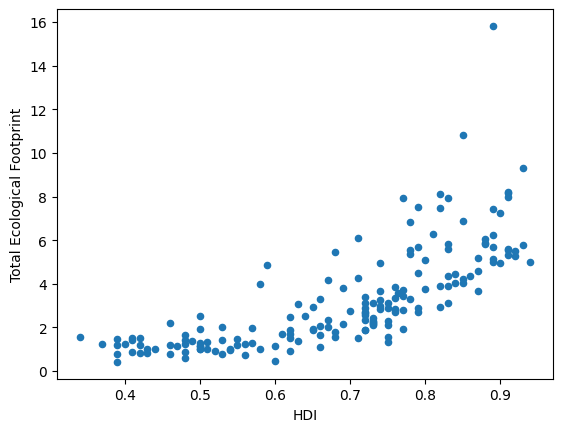

In [6]:
# HDI(Human Development Index) and Total Ecological Footprint
HDI_totalfootprint = pd.DataFrame(ecological_footprint, columns=['Country', 'HDI', 'Total Ecological Footprint'])
print('Before cleaning', HDI_totalfootprint.isnull().sum())
HDI_totalfootprint.dropna(how='any', inplace=True)
print('After cleaning', HDI_totalfootprint.isnull().sum())
HDI_totalfootprint.plot(kind='scatter', x='HDI', y='Total Ecological Footprint')




https://www.resilience.org/stories/2018-07-06/the-problem-with-the-human-development-index-in-an-era-of-ecological-breakdown/

In [7]:
highest_HDI = HDI_GDP[HDI_GDP['HDI']>0.8]
print(highest_HDI.describe())
print(highest_HDI.sort_values('HDI'))

             HDI  GDP per Capita
count  43.000000       43.000000
mean    0.872093    41534.106977
std     0.037069    24621.984684
min     0.810000    13540.000000
25%     0.835000    23405.550000
50%     0.880000    40817.400000
75%     0.905000    51709.750000
max     0.940000   114665.000000
                      Country   HDI  GDP per Capita
96                     Latvia  0.81         13732.0
12                    Bahrain  0.82         24299.0
78                    Hungary  0.82         13964.2
93                     Kuwait  0.82         41830.5
44                    Croatia  0.82         14522.8
101                 Lithuania  0.83         14373.7
178      United Arab Emirates  0.83         40817.4
137                  Portugal  0.83         23217.3
148              Saudi Arabia  0.83         23593.8
5                   Argentina  0.83         13540.0
36                      Chile  0.83         14525.8
153                  Slovakia  0.84         18103.1
136                    Pola

Let's look at the countries ranked highest in HDI. Min value of 'GDP per Capita' is 13540 and max is 114665. The incrase in HDI is 0.14 (from 0.8 to 0.94 which is 100 - 0.8*100/0.94 =15%) but increase in GDP is 101125 (from 13540 to 114665 which is 100- 13540*100/114665 = 88.19).  Partial conclusion: there is a quality threshold after which increase in GDP doesn't make big difference in HDI. 
**Now let's look at countries footprint. **

In [8]:
HDI_GDP_Eco_Footprint = pd.DataFrame(ecological_footprint, columns=['Country','HDI', 'GDP per Capita', 'Total Ecological Footprint'])
HDI_GDP_Eco_Footprint.sort_values('Total Ecological Footprint')

,Country,HDI,GDP per Capita,Total Ecological Footprint
56,Eritrea,0.39,$439.73,0.42
168,Timor-Leste,0.60,"$5,167.86",0.48
76,Haiti,0.48,$749.13,0.61
13,Bangladesh,0.56,$857.50,0.72
0,Afghanistan,0.46,$614.66,0.79
...,...,...,...,...
179,United States of America,0.91,"$49,725.00",8.22
8,Australia,0.93,"$66,604.20",9.31
138,Qatar,0.85,"$99,431.50",10.80
7,Aruba,NaN,NaN,11.88


In [9]:
print(ecological_footprint.head())

               Country                    Region  Population (millions)   HDI  \
0          Afghanistan  Middle East/Central Asia                  29.82  0.46   
1              Albania   Northern/Eastern Europe                   3.16  0.73   
2              Algeria                    Africa                  38.48  0.73   
3               Angola                    Africa                  20.82  0.52   
4  Antigua and Barbuda             Latin America                   0.09  0.78   

  GDP per Capita  Cropland Footprint  Grazing Footprint  Forest Footprint  \
0        $614.66                0.30               0.20              0.08   
1      $4,534.37                0.78               0.22              0.25   
2      $5,430.57                0.60               0.16              0.17   
3      $4,665.91                0.33               0.15              0.12   
4     $13,205.10                 NaN                NaN               NaN   

   Carbon Footprint  Fish Footprint  ...  Cropland

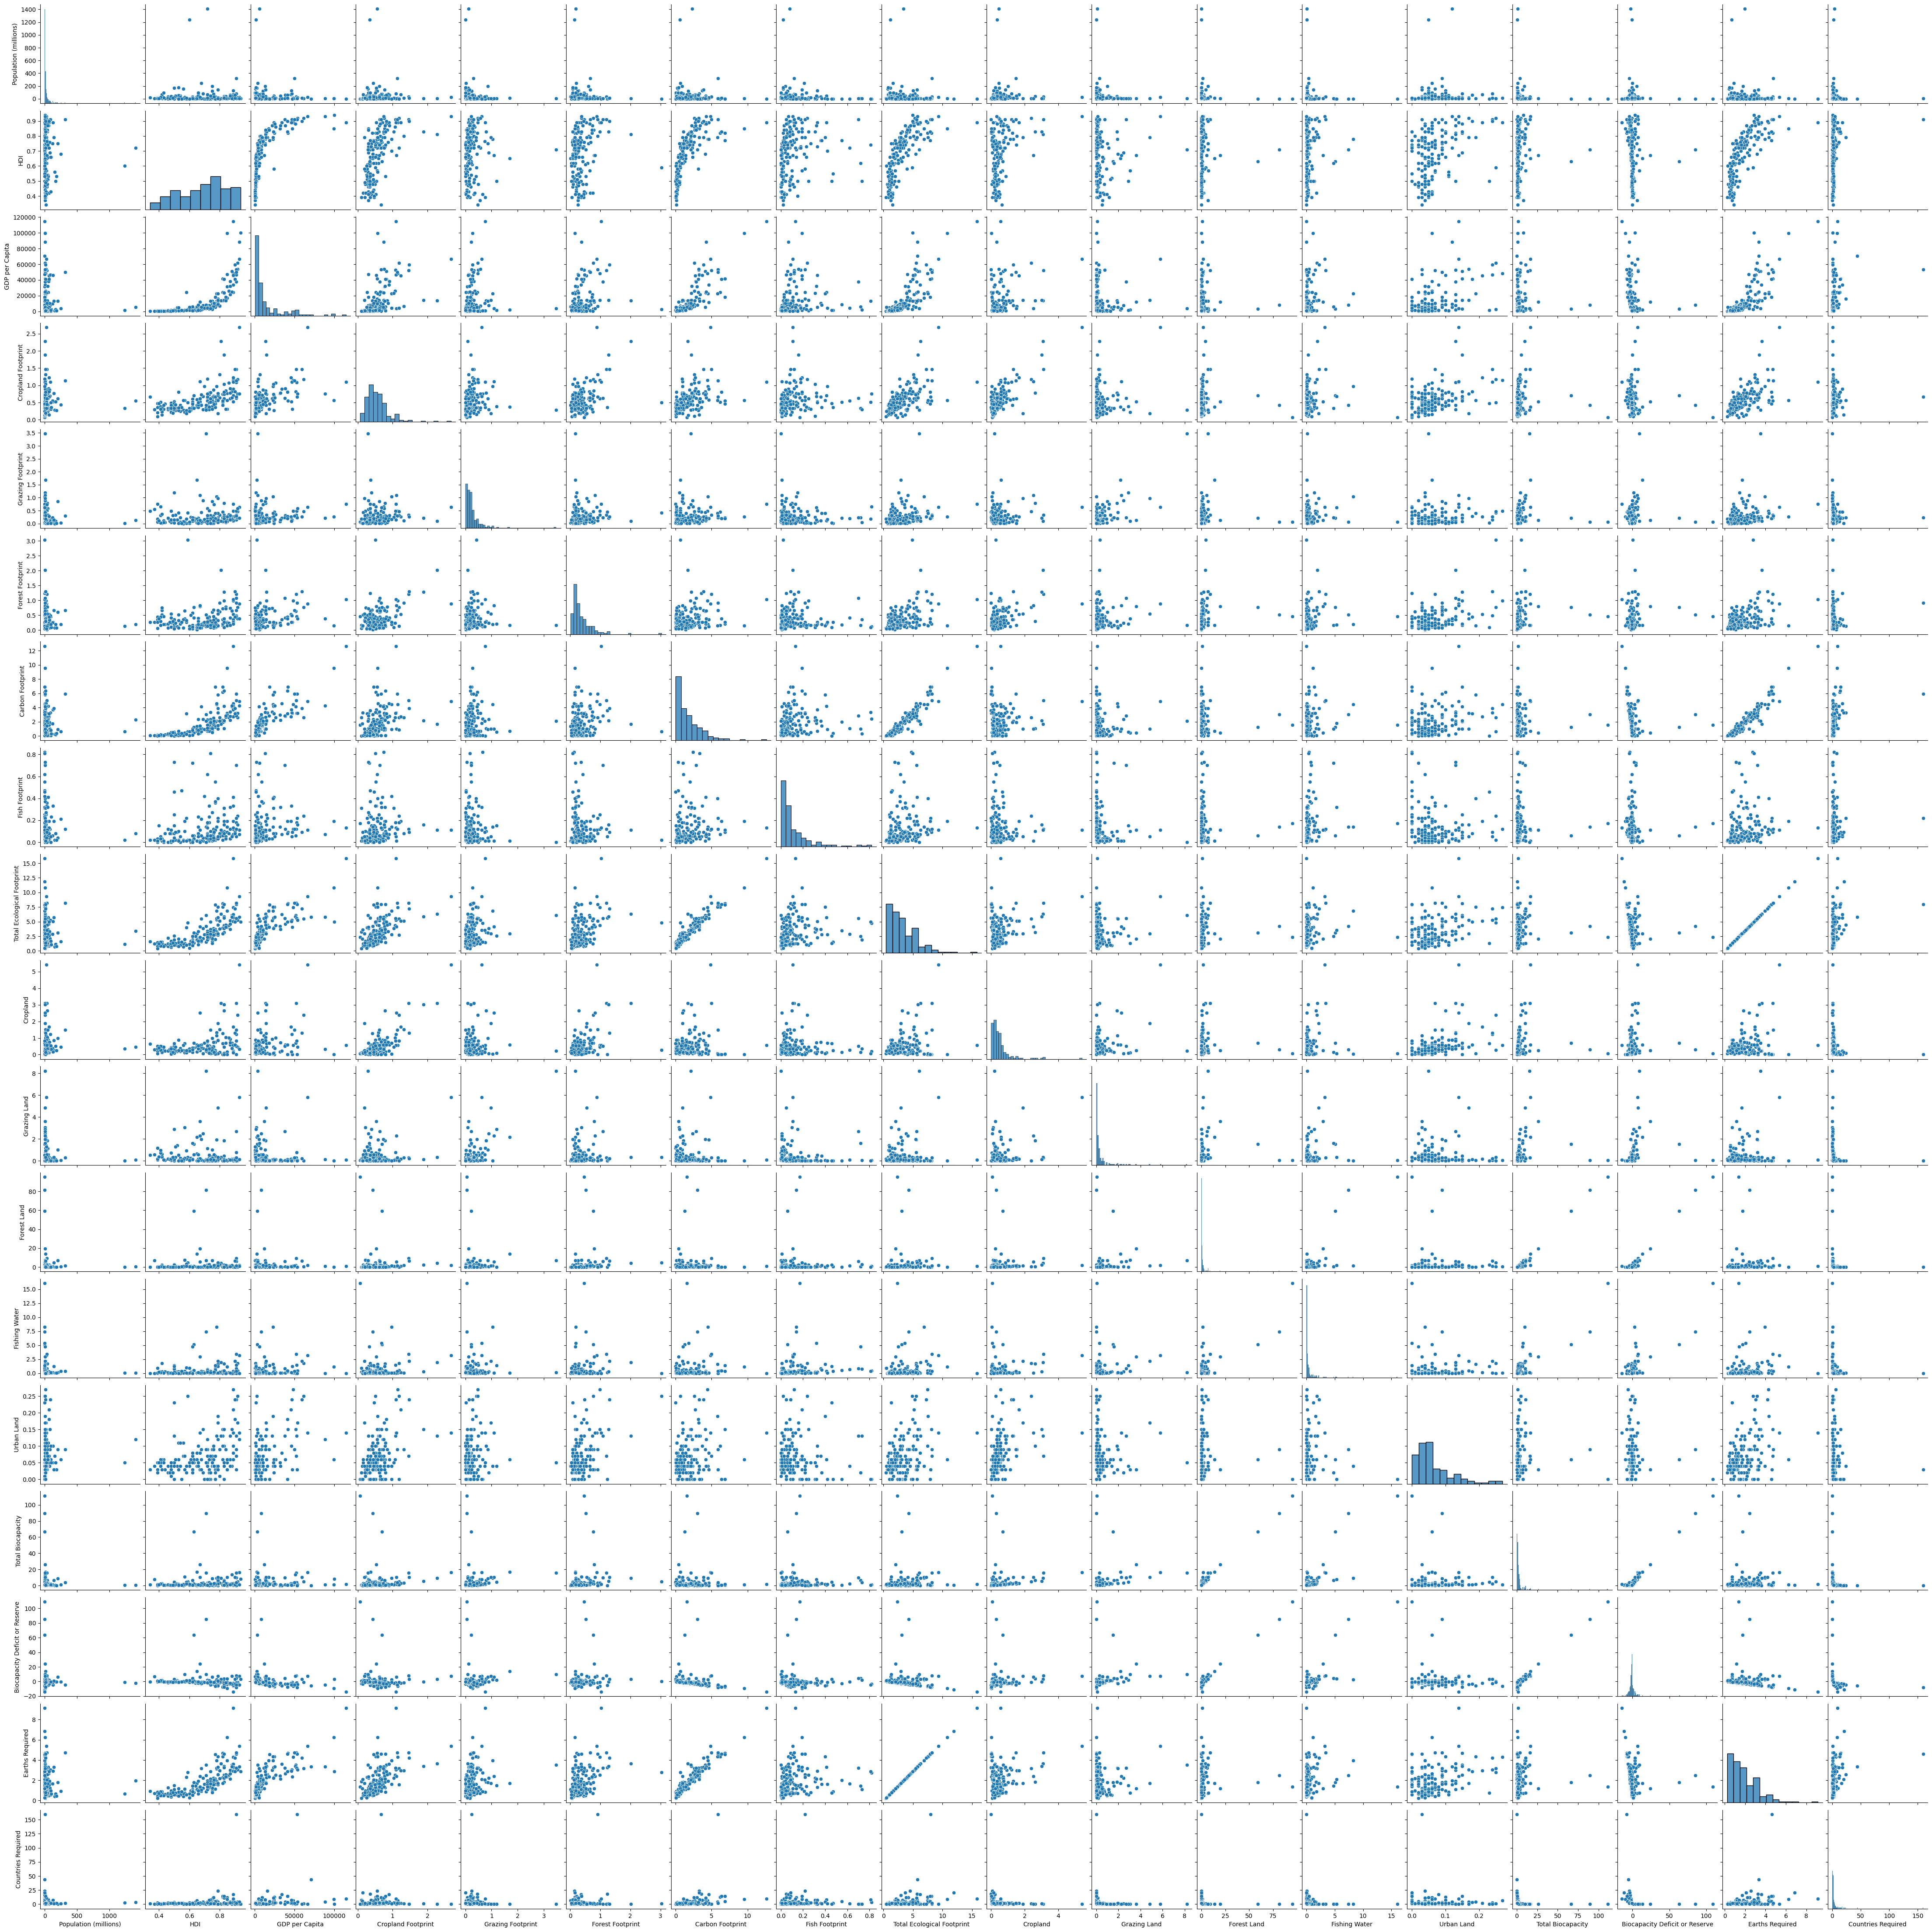

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
GDP = ecological_footprint['GDP per Capita']
GDP = GDP.replace({'\$': '', ',': ''}, regex=True).astype(float)
ecological_footprint['GDP per Capita'] = GDP
sns.pairplot(ecological_footprint)
plt.show()

In [11]:
corr = ecological_footprint.corr()
# show the strenght of relationship
corr.style.background_gradient(cmap='coolwarm')

C:\Users\PC\AppData\Local\Temp\ipykernel_1892\2744489484.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ecological_footprint.corr()


,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Population (millions),1.000000,-0.002684,-0.049895,-0.019567,-0.084928,-0.077887,-0.021166,-0.067031,-0.057722,0.013887,-0.068138,-0.045251,-0.070160,0.063246,-0.051211,-0.039241,-0.057650,-0.029374
HDI,-0.002684,1.000000,0.677448,0.567385,0.092248,0.231070,0.699447,0.209810,0.739086,0.326574,-0.001788,0.018801,0.130843,0.378490,0.077711,-0.113610,0.739072,0.191894
GDP per Capita,-0.049895,0.677448,1.000000,0.506345,0.105334,0.278039,0.824240,0.152211,0.799412,0.264256,-0.011003,-0.020860,0.160659,0.429659,0.042534,-0.165048,0.799333,0.257657
Cropland Footprint,-0.019567,0.567385,0.506345,1.000000,0.077909,0.437702,0.410321,0.080194,0.587706,0.765081,0.074739,-0.051494,0.076994,0.431885,0.016203,-0.095166,0.587565,0.023205
Grazing Footprint,-0.084928,0.092248,0.105334,0.077909,1.000000,0.056984,0.125627,-0.055461,0.275093,0.103578,0.696416,0.017368,0.074063,0.087197,0.089739,0.037187,0.275039,-0.029867
Forest Footprint,-0.077887,0.231070,0.278039,0.437702,0.056984,1.000000,0.194882,-0.041987,0.399892,0.416119,0.086731,0.142985,0.111545,0.457137,0.172636,0.096049,0.400157,0.080528
Carbon Footprint,-0.021166,0.699447,0.824240,0.410321,0.125627,0.194882,1.000000,0.155634,0.951867,0.118509,-0.041753,0.010415,0.113483,0.224280,0.028757,-0.151582,0.951872,0.306791
Fish Footprint,-0.067031,0.209810,0.152211,0.080194,-0.055461,-0.041987,0.155634,1.000000,0.193230,-0.061319,-0.065930,0.013243,0.166797,-0.038714,0.025336,-0.011303,0.192969,0.065981
Total Ecological Footprint,-0.057722,0.739086,0.799412,0.587706,0.275093,0.399892,0.951867,0.193230,1.000000,0.302500,0.093720,0.025955,0.144556,0.356702,0.066580,-0.135312,0.999997,0.282719
Cropland,0.013887,0.326574,0.264256,0.765081,0.103578,0.416119,0.118509,-0.061319,0.302500,1.000000,0.299930,0.002206,0.092731,0.445291,0.097184,0.039392,0.302457,-0.132391


Let's predict Total Ecological Footprint using different sets of features. 
Linear Regression.

In [12]:
ecological_footprint.isnull().sum()

Country                            0
Region                             0
Population (millions)              0
HDI                               16
GDP per Capita                    15
Cropland Footprint                15
Grazing Footprint                 15
Forest Footprint                  15
Carbon Footprint                  15
Fish Footprint                    15
Total Ecological Footprint         0
Cropland                          15
Grazing Land                      15
Forest Land                       15
Fishing Water                     15
Urban Land                        15
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64

Some cleaning

In [13]:
ecological_footprint['HDI'].fillna(0, inplace=True)
ecological_footprint['GDP per Capita'].fillna(0, inplace=True)
ecological_footprint['Cropland Footprint'].fillna(0, inplace=True)
ecological_footprint['Grazing Footprint'].fillna(0, inplace=True)
ecological_footprint['Forest Footprint'].fillna(0, inplace=True)
ecological_footprint['Carbon Footprint'].fillna(0, inplace=True)
ecological_footprint['Fish Footprint'].fillna(0, inplace=True)
ecological_footprint['Cropland'].fillna(0, inplace=True)
ecological_footprint['Grazing Land'].fillna(0, inplace=True)
ecological_footprint['Forest Land'].fillna(0, inplace=True)
ecological_footprint['Fishing Water'].fillna(0, inplace=True)
ecological_footprint['Urban Land'].fillna(0, inplace=True)
ecological_footprint.isnull().sum()


Country                           0
Region                            0
Population (millions)             0
HDI                               0
GDP per Capita                    0
Cropland Footprint                0
Grazing Footprint                 0
Forest Footprint                  0
Carbon Footprint                  0
Fish Footprint                    0
Total Ecological Footprint        0
Cropland                          0
Grazing Land                      0
Forest Land                       0
Fishing Water                     0
Urban Land                        0
Total Biocapacity                 0
Biocapacity Deficit or Reserve    0
Earths Required                   0
Countries Required                0
Data Quality                      0
dtype: int64

**Linear Regression: predicting 'Total Ecological Footprint'**

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error
#x
population = ecological_footprint['Population (millions)']
population = population.apply(lambda x:x/100)
HDI = ecological_footprint['HDI']
GDP = ecological_footprint['GDP per Capita']
crop_fft = ecological_footprint['Cropland Footprint']
grzng_fft = ecological_footprint['Grazing Footprint']
forest_fft = ecological_footprint['Forest Footprint']
carbon_fft = ecological_footprint['Carbon Footprint']
fish_fft = ecological_footprint['Fish Footprint']
crop_lnd = ecological_footprint['Cropland']
grz_lnd = ecological_footprint['Grazing Land']
forest_lnd = ecological_footprint['Forest Land']
fish_water = ecological_footprint['Fishing Water']
urb_lnd = ecological_footprint['Urban Land']
ttl_biocapacity = ecological_footprint['Total Biocapacity']
#y
total_footprint = ecological_footprint['Total Ecological Footprint']
x = np.array([population,HDI,GDP,crop_fft,grzng_fft,forest_fft,forest_fft,carbon_fft,fish_fft,crop_lnd,grz_lnd,forest_lnd,fish_water,urb_lnd,ttl_biocapacity]).T
y = np.array([total_footprint]).T
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    total_footprint, \
                                                    test_size=0.2, \
                                                    random_state=4)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
print("MSE ", mse)
print("MSE ",mean_squared_error(y_test, y_pred))

MSE  0.7836885409955453
MSE  0.7836885409955453


In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error
#x
population = ecological_footprint['Population (millions)']
population = population.apply(lambda x:x/100)
HDI = ecological_footprint['HDI']
GDP = ecological_footprint['GDP per Capita']
fish = ecological_footprint['Fish Footprint']
grzng_land = ecological_footprint['Grazing Land']
forest = ecological_footprint['Forest Land']
fish_water = ecological_footprint['Fishing Water']
ttl_biocapacity = ecological_footprint['Total Biocapacity']
#y
total_footprint = ecological_footprint['Total Ecological Footprint']
x = np.array([population,HDI,GDP,fish,grzng_land,forest,fish_water,ttl_biocapacity]).T
y = np.array([total_footprint]).T
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    total_footprint, \
                                                    test_size=0.2, \
                                                    random_state=4)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
print("MSE ", mse)
print("MSE ",mean_squared_error(y_test, y_pred))

MSE  3.9632858761395116
MSE  3.9632858761395116


In [16]:
cor_target = abs(corr['Total Ecological Footprint'])#Selecting least correlated features
relevant_features = cor_target[cor_target<0.2]
relevant_features

Population (millions)             0.057722
Fish Footprint                    0.193230
Grazing Land                      0.093720
Forest Land                       0.025955
Fishing Water                     0.144556
Total Biocapacity                 0.066580
Biocapacity Deficit or Reserve    0.135312
Name: Total Ecological Footprint, dtype: float64

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error
#x
population = ecological_footprint['Population (millions)']
population = population.apply(lambda x:x/100)
fish = ecological_footprint['Fish Footprint']
grzng_land = ecological_footprint['Grazing Land']
forest = ecological_footprint['Forest Land']
fish_water = ecological_footprint['Fishing Water']
ttl_biocapacity = ecological_footprint['Total Biocapacity']
#y
total_footprint = ecological_footprint['Total Ecological Footprint']
x = np.array([population,fish,grzng_land,forest,fish_water,ttl_biocapacity]).T
y = np.array([total_footprint]).T
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    total_footprint, \
                                                    test_size=0.2, \
                                                    random_state=4)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
print("MSE ", mse)
print("MSE ",mean_squared_error(y_test, y_pred))

MSE  8.923722274337987
MSE  8.923722274337987


In [18]:
cor_target = abs(corr['Total Ecological Footprint'])#Selecting least correlated features
relevant_features = cor_target[cor_target<0.1]
relevant_features

Population (millions)    0.057722
Grazing Land             0.093720
Forest Land              0.025955
Total Biocapacity        0.066580
Name: Total Ecological Footprint, dtype: float64

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error
#x
population = ecological_footprint['Population (millions)']
population = population.apply(lambda x:x/100)
grzng_land = ecological_footprint['Grazing Land']
forest = ecological_footprint['Forest Land']
ttl_biocapacity = ecological_footprint['Total Biocapacity']
#y
total_footprint = ecological_footprint['Total Ecological Footprint']
x = np.array([population,grzng_land,forest,ttl_biocapacity]).T
y = np.array([total_footprint]).T
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    total_footprint, \
                                                    test_size=0.2, \
                                                    random_state=4)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
print("MSE ", mse)
print("MSE ",mean_squared_error(y_test, y_pred))

MSE  8.7356624294786
MSE  8.7356624294786


In [20]:
cor_target = abs(corr['Total Ecological Footprint'])#Selecting least correlated features
relevant_features = cor_target[cor_target<0.06]
relevant_features

Population (millions)    0.057722
Forest Land              0.025955
Name: Total Ecological Footprint, dtype: float64

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error
#x
population = ecological_footprint['Population (millions)']
population = population.apply(lambda x:x/100)
forest = ecological_footprint['Forest Land']
#y
total_footprint = ecological_footprint['Total Ecological Footprint']
x = np.array([population, forest]).T
y = np.array([total_footprint]).T
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    total_footprint, \
                                                    test_size=0.2, \
                                                    random_state=4)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
print("MSE ", mse)
print("MSE ",mean_squared_error(y_test, y_pred))


MSE  9.446042193852259
MSE  9.446042193852259


In [22]:
print(ecological_footprint.shape)

(188, 21)


In [23]:
print(ecological_footprint['Total Ecological Footprint'])

0      0.79
1      2.21
2      2.12
3      0.93
4      5.38
       ... 
183    1.65
184    2.07
185    1.03
186    0.99
187    1.37
Name: Total Ecological Footprint, Length: 188, dtype: float64


**Logistic Regression: predicting level of 'Total Ecological Footprint' based on giving features.** 
The minimum ecological footprint was 0.41 (excluding 0.0) and the maximum was 15.82 so we made the ranges: (0.00-4.999:’Low’, 5-10.00: ‘Medium’, and 10.01-16:’High’).

In [24]:
total_footprint = ecological_footprint['Total Ecological Footprint']
temp_arr=[]
for impact in total_footprint:
    if impact >= 10:
        temp_arr.append(2)
    if impact < 5:
        temp_arr.append(0)
    else:
        temp_arr.append(1)
#print(temp_arr)


total_footprint_categorized has encoded category insread of float representation of 'Total Ecological Footprint'

In [25]:
total_footprint_categorized = total_footprint.copy()
i = 0
while i < 188:
    total_footprint_categorized[i] = temp_arr[i]
    i = i+1
#print(total_footprint_categorized[0:50])
print(total_footprint_categorized.shape)

(188,)


Create Logistic regression model. 

Accuracy rate is: 0.82
Logistic Area under the curve = 0.62
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        32
         1.0       0.40      0.33      0.36         6

    accuracy                           0.82        38
   macro avg       0.64      0.62      0.63        38
weighted avg       0.80      0.82      0.81        38



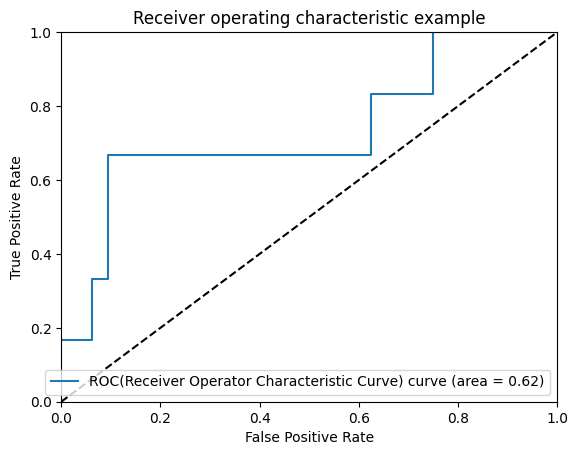

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

x = ecological_footprint[["Population (millions)","HDI","GDP per Capita","Cropland Footprint","Grazing Footprint","Forest Footprint","Carbon Footprint","Fish Footprint",
"Cropland","Grazing Land","Forest Land","Fishing Water","Urban Land","Total Biocapacity"]].copy(deep=True)
y = total_footprint_categorized
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
model = LogisticRegression(penalty='l2', C=1)
y_train = np.array(y_train).flatten()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
confusion_matrix(y_test, ypred)
print("Accuracy rate is: %0.2f" %(accuracy_score(y_test, ypred)))
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic Area under the curve = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

b = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, b)
plt.figure()
plt.plot(fpr, tpr, label='ROC(Receiver Operator Characteristic Curve) curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Accuracy rate is: 0.87
Logistic Area under the curve = 0.72
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        32
         1.0       0.60      0.50      0.55         6

    accuracy                           0.87        38
   macro avg       0.75      0.72      0.73        38
weighted avg       0.86      0.87      0.86        38



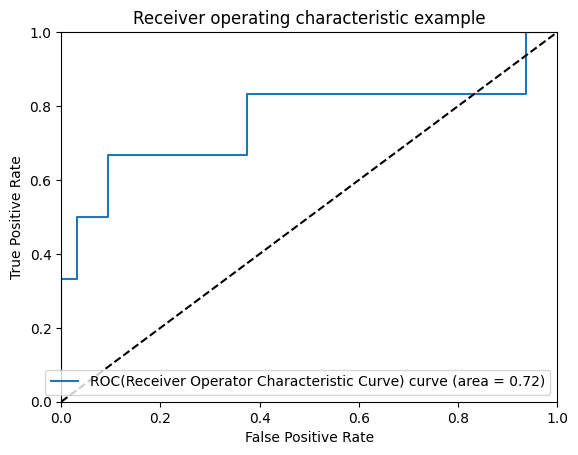

In [27]:
x = ecological_footprint[["Population (millions)","Forest Footprint","Urban Land","Total Biocapacity"]].copy(deep=True)
y = total_footprint_categorized
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
model = LogisticRegression(penalty='l2', C=1)
y_train = np.array(y_train).flatten()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
confusion_matrix(y_test, ypred)
print("Accuracy rate is: %0.2f" %(accuracy_score(y_test, ypred)))
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic Area under the curve = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

b = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, b)
plt.figure()
plt.plot(fpr, tpr, label='ROC(Receiver Operator Characteristic Curve) curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [28]:
x = ecological_footprint[["Population (millions)","HDI","GDP per Capita","Cropland Footprint","Grazing Footprint","Forest Footprint","Carbon Footprint","Fish Footprint",
"Cropland","Grazing Land","Forest Land","Fishing Water","Urban Land","Total Biocapacity"]].copy(deep=True)
y = total_footprint_categorized
x = scaler.fit_transform(x)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, \
                                                    y, \
                                                    test_size=0.2, \
                                                    random_state=4)
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=4)
svclassifier.fit(x_train_svm, y_train_svm)

SVC(degree=4, kernel='poly')

In [29]:
y_pred_svm = svclassifier.predict(x_test_svm)
from sklearn.metrics import classification_report, confusion_matrix
print(accuracy_score(y_test_svm, y_pred_svm))

print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))


0.7631578947368421
[[28  1  0]
 [ 7  1  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        29
         1.0       0.50      0.12      0.20         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.43      0.36      0.35        38
weighted avg       0.70      0.76      0.70        38



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [30]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train_svm, y_train_svm)

SVC()

In [31]:
y_pred_svm = svclassifier.predict(x_test_svm)
print(accuracy_score(y_test_svm, y_pred_svm))

print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))


0.7631578947368421
[[29  0  0]
 [ 8  0  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        29
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.25      0.33      0.29        38
weighted avg       0.58      0.76      0.66        38



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [32]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train_svm, y_train_svm)

y_pred_svm = svclassifier.predict(x_test_svm)
print(accuracy_score(y_test_svm, y_pred_svm))

print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))

0.7631578947368421
[[29  0  0]
 [ 8  0  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        29
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.25      0.33      0.29        38
weighted avg       0.58      0.76      0.66        38



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [33]:
x = ecological_footprint[["Population (millions)","Forest Footprint","Urban Land","Total Biocapacity"]].copy(deep=True)
y = total_footprint_categorized
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [34]:
svclassifier = SVC(kernel='poly', degree=4)
svclassifier.fit(x_train_svm, y_train_svm)
y_pred_svm = svclassifier.predict(x_test_svm)
print(accuracy_score(y_test_svm, y_pred_svm))

print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))

0.7631578947368421
[[28  1  0]
 [ 7  1  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        29
         1.0       0.50      0.12      0.20         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.43      0.36      0.35        38
weighted avg       0.70      0.76      0.70        38



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [35]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train_svm, y_train_svm)
y_pred_svm = svclassifier.predict(x_test_svm)

print(accuracy_score(y_test_svm, y_pred_svm))
print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))

0.7631578947368421
[[29  0  0]
 [ 8  0  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        29
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.25      0.33      0.29        38
weighted avg       0.58      0.76      0.66        38



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [36]:
vclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train_svm, y_train_svm)

y_pred_svm = svclassifier.predict(x_test_svm)
print(accuracy_score(y_test_svm, y_pred_svm))

print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))

0.7631578947368421
[[29  0  0]
 [ 8  0  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        29
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.25      0.33      0.29        38
weighted avg       0.58      0.76      0.66        38



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [37]:
print(ecological_footprint.describe(percentiles=[0.25,0.5,0.75]))

       Population (millions)         HDI  GDP per Capita  Cropland Footprint  \
count             188.000000  188.000000      188.000000          188.000000   
mean               37.342372    0.627946    13102.288351            0.532074   
std               140.756836    0.243191    20439.774902            0.375560   
min                 0.000000    0.000000        0.000000            0.000000   
25%                 2.037500    0.500000     1107.095000            0.310000   
50%                 7.970000    0.710000     4687.380000            0.485000   
75%                24.870000    0.790000    13818.175000            0.672500   
max              1408.040000    0.940000   114665.000000            2.680000   

       Grazing Footprint  Forest Footprint  Carbon Footprint  Fish Footprint  \
count         188.000000        188.000000        188.000000      188.000000   
mean            0.242181          0.343989          1.660904        0.112713   
std             0.345139          0.359

We now could try to look at categories for the SVM classifier using not {'High','Medium','Low'} but the percentiles 25,50,75 percent. We get this from the DataFrame describe command.

In [38]:
bins = [0,1.4825,2.74,4.64,15.82]
group_names = [0,1,2,3]

In [39]:
ecological_footprint['eco_foot_class'] = pd.cut(ecological_footprint['Total Ecological Footprint'], bins, labels=group_names)

In [40]:
print(ecological_footprint['eco_foot_class'])

0      0
1      1
2      1
3      0
4      3
      ..
183    1
184    1
185    0
186    0
187    0
Name: eco_foot_class, Length: 188, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [41]:
# We do SVM first on the model with all the features---only going to use rbf for brevity
x = ecological_footprint[["Population (millions)","HDI","GDP per Capita","Cropland Footprint","Grazing Footprint","Forest Footprint","Carbon Footprint","Fish Footprint",
"Cropland","Grazing Land","Forest Land","Fishing Water","Urban Land","Total Biocapacity"]].copy(deep=True)
y = ecological_footprint['eco_foot_class']
x = scaler.fit_transform(x)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, \
                                                    y, \
                                                    test_size=0.2, \
                                                    random_state=4)

svclassifier = SVC(kernel='rbf', degree=4)
svclassifier.fit(x_train_svm, y_train_svm)
y_pred_svm = svclassifier.predict(x_test_svm)
print(confusion_matrix(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))

[[ 8  1  0  0]
 [ 1  4  1  0]
 [ 0  2  6  0]
 [ 0  0  3 12]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.57      0.67      0.62         6
           2       0.60      0.75      0.67         8
           3       1.00      0.80      0.89        15

    accuracy                           0.79        38
   macro avg       0.77      0.78      0.76        38
weighted avg       0.82      0.79      0.80        38



In [42]:
# Decision Tree using the percentile classifier
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()


In [43]:
tree_model.fit(x_train_svm, y_train_svm)
y_predict_tree = tree_model.predict(x_test_svm)

from sklearn.metrics import accuracy_score

accuracy_score(y_test_svm, y_predict_tree)


0.7894736842105263

In [44]:

print(confusion_matrix(y_test_svm, y_predict_tree))
print(classification_report(y_test_svm, y_predict_tree))
#tree.export_graphviz(tree_model.tree_, out_file='tree.dot', feature_names=ecological_footprint.columns)
# could not get graphviz to work

[[ 6  2  0  1]
 [ 1  3  1  1]
 [ 0  0  7  1]
 [ 0  0  1 14]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.60      0.50      0.55         6
           2       0.78      0.88      0.82         8
           3       0.82      0.93      0.87        15

    accuracy                           0.79        38
   macro avg       0.76      0.74      0.75        38
weighted avg       0.79      0.79      0.78        38



In [45]:
# Now doing some graphs to color by region and marker size based on population
# The legends using legend_elements don't work here--examples online are the same
ef = pd.read_csv("/kaggle/input/ecological-footprint/countries.csv")

reg = {'Middle East/Central Asia':0,'Northern/Eastern Europe':1,'Africa':2,'Latin America':3,'Asia-Pacific':4,'European Union':5,'North America':6}
#print(ef)
eff = ef.copy(deep=True)
eff['Region'] = ef['Region'].replace(reg,inplace=True)

#print(ef.head())
#print(ef.dtypes)
fig,ax = plt.subplots()
fig.suptitle('Total Ecological Footprint vs HDI by Country/Region')
scatter = ax.scatter(x=ef['HDI'],y=ef['Total Ecological Footprint'],c=ef['Region'],s=ef['Population (millions)'])

plt.xlabel('HDI')
plt.ylabel('Total Ecological Footprint')
fig.suptitle('Total Ecological Footprint vs HDI by Country/Region')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/ecological-footprint/countries.csv'

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(10,10))

#fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x=ef['HDI'],y=ef['Carbon Footprint'],c=ef['Region'],s=ef['Population (millions)'])

axs[0,0].set_title('Carbon Footprint')
axs[0,1].scatter(x=ef['HDI'],y=ef['Cropland Footprint'],c=ef['Region'],s=ef['Population (millions)'])

axs[0,1].set_title('Cropland Footprint')
axs[0,2].scatter(x=ef['HDI'],y=ef['Fish Footprint'],c=ef['Region'],s=ef['Population (millions)'])

axs[0,2].set_title('Fish Footprint')
axs[1,0].scatter(x=ef['HDI'],y=ef['Grazing Footprint'],c=ef['Region'],s=ef['Population (millions)'])

axs[1,0].set_title('Grazing Footprint')
axs[1,1].scatter(x=ef['HDI'],y=ef['Forest Footprint'],c=ef['Region'],s=ef['Population (millions)'])

axs[1,1].set_title('Forest Footprint')
axs[1,2].scatter(x=ef['HDI'],y=ef['Total Ecological Footprint'],c=ef['Region'],s=ef['Population (millions)'])

axs[1,2].set_title('Total Footprint')

for ax in axs.flat:
    ax.set(xlabel='HDI', ylabel='Total Ecological Footprint')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.suptitle('Footprint Components vs HDI by Country/Region')

In [ ]:
# couldn't get the automatic legend to work using legend_elements() but Asia: green, North America: yellow